In [1]:
%load_ext autoreload
%autoreload 2
from glucose_dataset import GlucoseDataset
import matplotlib.pyplot as plt
import numpy as np

ds = GlucoseDataset("datasets/diabetes_datasets.zip", sub_directory="Shanghai_T1DM")
raw_sample = (ds._fetch_raw_glucose_data("Shanghai_T1DM/1011_0_20210622.xls") - ds.min) / (ds.max - ds.min)

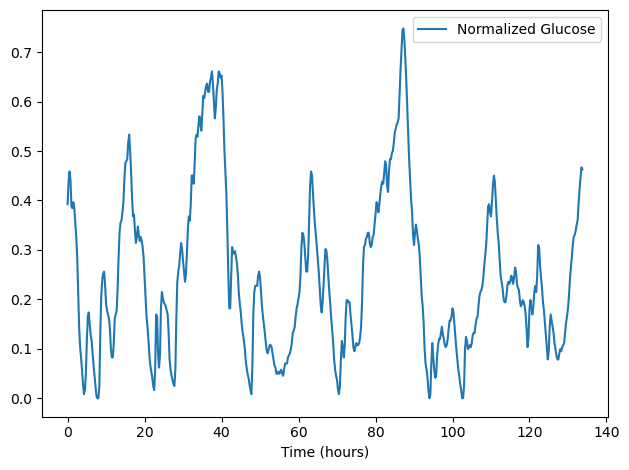

In [2]:
# Plot the time series
time = np.arange(0, len(raw_sample)) * ds.sample_interval
plt.plot(time/(60*60), raw_sample, label='Normalized Glucose')
plt.xlabel('Time (hours)')
plt.legend()
plt.tight_layout()

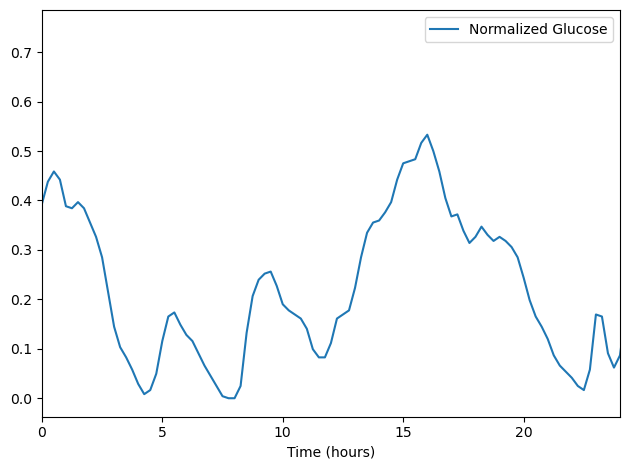

In [3]:
# Plot the time series
time = np.arange(0, len(raw_sample)) * ds.sample_interval
plt.plot(time / (60*60), raw_sample, label='Normalized Glucose')
plt.xlim(0, 24) # 24 hours
plt.xlabel('Time (hours)')
plt.legend()
plt.tight_layout()

In [4]:
print(f'Dataset shape is {ds.samples.shape}')

Dataset shape is torch.Size([15295, 24, 1])


torch.Size([17, 24, 1])


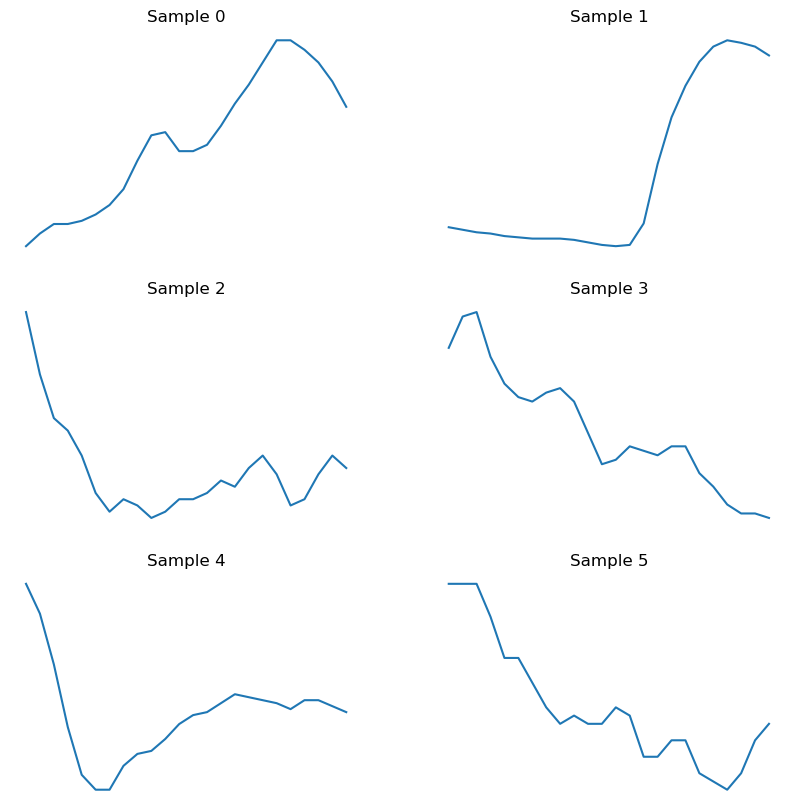

In [5]:
# Plot the first batch from a Dataloader in a 3x2 grid
from torch.utils.data import DataLoader
dl = DataLoader(ds, batch_size=32, shuffle=True)
batch = next(iter(dl))
print(batch.shape)
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
for i in range(6):
    ax = axs[i // 2, i % 2]
    ax.plot(batch[i])
    ax.set_title(f'Sample {i}')
    ax.grid(False)
    ax.axis('off')